<a href="https://colab.research.google.com/github/MadgeneM/DDS8555/blob/main/MoiseMDDS8555_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Title: Assignment 7
# Author: Madgene Moise
# Date: Sunday, June 29, 2025

The following Python programming script answers the Applied Question #9 from pages 554 and 555 of the textbook titled “An Introduction to Statistical Learning with Applications in Python” (ISLR Python), a.k.a. the Python edition (ISLP).

In [1]:
# Load necessary libraries
import numpy as np
import pandas as pd
from statsmodels.datasets import get_rdataset
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from sklearn.preprocessing import StandardScaler

# Load the USArrests dataset
USArrests = get_rdataset('USArrests').data
states = USArrests.index.tolist()

In [2]:
# Part (a): Hierarchical clustering using complete linkage and Euclidean distance
linkage_matrix = linkage(USArrests, method='complete', metric='euclidean')

In [3]:
# Part (b): Cut dendrogram to form 3 clusters
clusters = cut_tree(linkage_matrix, n_clusters=3).flatten()
cluster_assignments = pd.DataFrame({'State': states, 'Cluster': clusters + 1})

In [4]:
# Part (c): Scale the variables and repeat clustering
scaler = StandardScaler()
USArrests_scaled = scaler.fit_transform(USArrests)
linkage_matrix_scaled = linkage(USArrests_scaled, method='complete', metric='euclidean')
clusters_scaled = cut_tree(linkage_matrix_scaled, n_clusters=3).flatten()
cluster_assignments_scaled = pd.DataFrame({'State': states, 'Cluster': clusters_scaled + 1})

In [10]:
# Combine and display the original and scaled cluster assignments
combined_clusters = pd.concat(
    [cluster_assignments.set_index('State'), cluster_assignments_scaled.set_index('State')],
    axis=1,
    keys=['Original', 'Scaled']
)

# Show the combined DataFrame
print(combined_clusters)

               Original  Scaled
                Cluster Cluster
State                          
Alabama               1       1
Alaska                1       1
Arizona               1       2
Arkansas              2       3
California            1       2
Colorado              2       2
Connecticut           3       3
Delaware              1       3
Florida               1       2
Georgia               2       1
Hawaii                3       3
Idaho                 3       3
Illinois              1       2
Indiana               3       3
Iowa                  3       3
Kansas                3       3
Kentucky              3       3
Louisiana             1       1
Maine                 3       3
Maryland              1       2
Massachusetts         2       3
Michigan              1       2
Minnesota             3       3
Mississippi           1       1
Missouri              2       3
Montana               3       3
Nebraska              3       3
Nevada                1       2
New Hamp

The table above shows the clustering assignments of the USArrests data for both:


*   Original variables (unscaled)
*   Standarized variables (scaled to have standard deviation one)

The following is my answer to Question #9, part (d). Scaling the variables significantly affects the hierarchical clustering result. This is evident in the cluster assignment changes between the original and scaled data. Without scaling, the variables with larger numerical ranges (e.g., Assault) dominate the distance computation, potentially biasing the clustering. After scaling, each variable contributes equally to the Euclidean distance, allowing for more balanced clustering based on all features. Therefore, I would recommend that variables be scaled before computing inter-observation dissimilarities when the features are on different scales. My justification for this recommendation is (1) noticing that the Euclidean distance is sensitive to scale, (2) observing that features like Assault (range ~300) will outweigh Murder or Rape if not scaled, and (3) standardizing ensures that all variables contribute equally, leading to more meaningful and interpretable clusters.

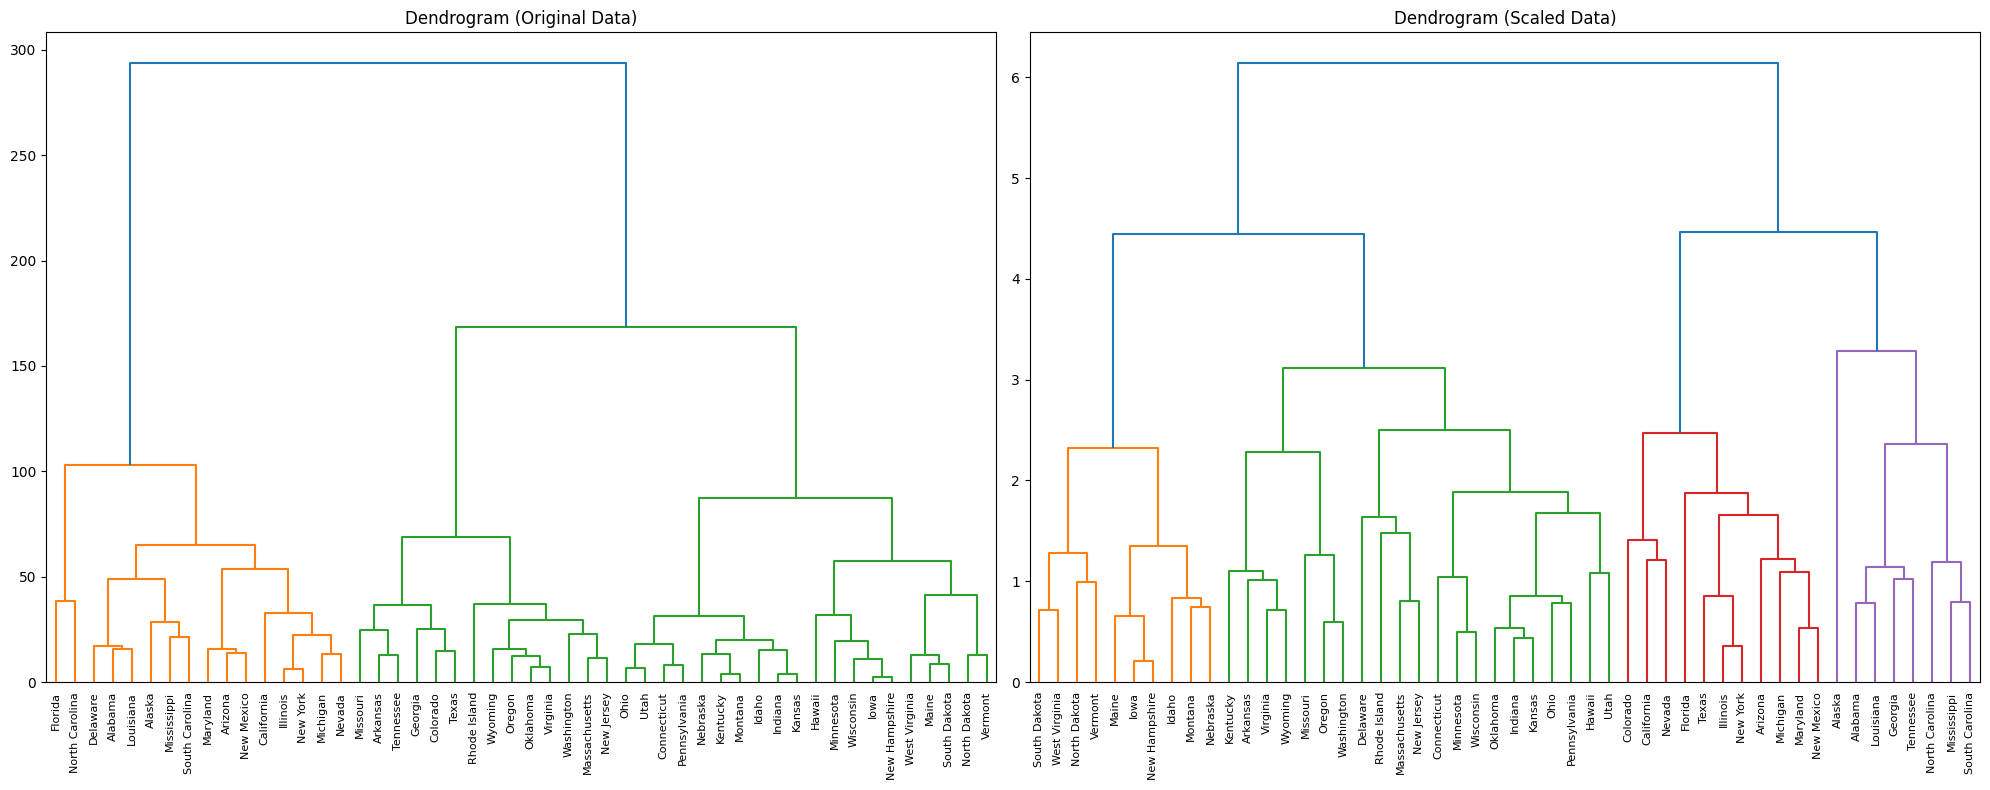

In [11]:
import matplotlib.pyplot as plt

# Create side-by-side dendrograms for original and scaled data
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Dendrogram for original data
axes[0].set_title("Dendrogram (Original Data)")
dendrogram(linkage_matrix, labels=states, leaf_rotation=90, leaf_font_size=8, ax=axes[0])

# Dendrogram for scaled data
axes[1].set_title("Dendrogram (Scaled Data)")
dendrogram(linkage_matrix_scaled, labels=states, leaf_rotation=90, leaf_font_size=8, ax=axes[1])

plt.tight_layout()
plt.show()

The image above are the dendrograms comparing the hierarchical clustering results. The dendrogram on the left clustered based on the original USArrests data (unscaled). The dendrogram on the right clusered based on the scaled USArrests data (each variable standarized to mean 0 and standard deviation 1). In the original dendrogram, variables with large ranges (e.g., Assault) dominate the clustering. This leads to different cluster formations. In the scaled dendrogram, each variable contributes equally, producing a more balanced and interpretable cluster structure. Overall, these visualizations further reinforce the conclusion that scalling is essential when applying distance-based clustering methods like hierarchial clustering using Euclidean distance.